In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('iris.csv')
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [35]:
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [36]:
species = df['species'].tolist()
X=df.drop("species",1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [38]:
X_corr = 1/150 * X.T.dot(X)
X_corr

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [39]:
eig_val,eig_vect = np.linalg.eig(X_corr)

variance of each feature: [72.96244541 22.85076179  3.66892189  0.51787091]


Text(0.5, 0, 'dimensions')

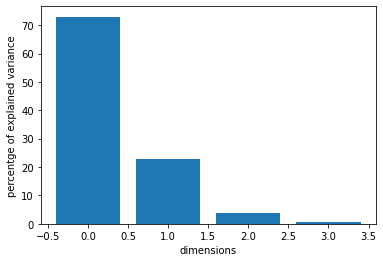

In [40]:
total=sum(eig_val)
variance=eig_val/total*100
print("variance of each feature:",variance)
plt.bar(range(4),variance)
plt.ylabel('percentge of explained variance')
plt.xlabel('dimensions')

In [41]:
pc1=X.dot(eig_vect[:,0])
pc2=X.dot(eig_vect[:,1])
res=pd.DataFrame(pc1,columns=["pc1"])
res['pc2']=pc2
res['target']=species
res.head()

,pc1,pc2,target
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


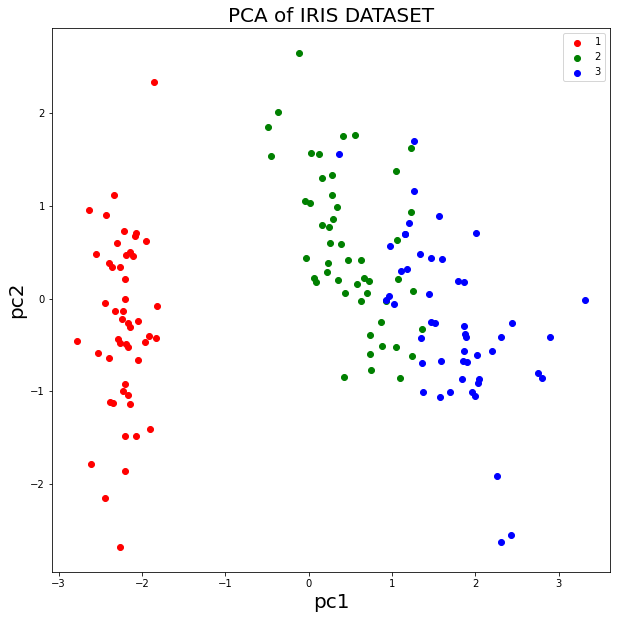

In [50]:
plt.figure(figsize=(10,10))
plt.xlabel('pc1',fontsize=20)
plt.ylabel('pc2',fontsize=20)
plt.title("PCA of IRIS DATASET",fontsize=20)
targets=[1,2,3]
colors=['r','g','b']
for target,color in zip(targets,colors):
    indicestokeep=res['target'] == target
    plt.scatter(res.loc[indicestokeep,'pc1'],res.loc[indicestokeep,'pc2'],c=color)
plt.legend(targets)
plt.show()
    